In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # type: ignore

# Set a consistent style for all plots
sns.set_theme(style="whitegrid")

In [6]:
# Load the dataset
df = pd.read_csv('fact_bookings.csv')

C:\Users\KUNAL MANDAL\AppData\Local\Temp\ipykernel_18196\2575933463.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_type_counts.index, y=day_type_counts.values, palette=['skyblue', 'salmon'], order=['Weekday', 'Weekend'])


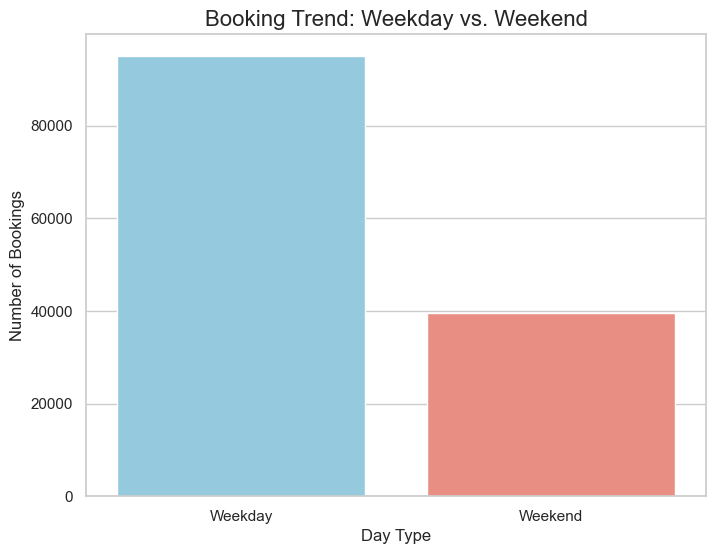

In [7]:
# Convert 'booking_date' to a datetime object
df['booking_date'] = pd.to_datetime(df['booking_date'])

# Get the day of the week (Monday=0, Sunday=6)
df['day_of_week'] = df['booking_date'].dt.dayofweek

# Categorize into 'Weekday' or 'Weekend'
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Count the bookings
day_type_counts = df['day_type'].value_counts()

# Visualize the result
plt.figure(figsize=(8, 6))
sns.barplot(x=day_type_counts.index, y=day_type_counts.values, palette=['skyblue', 'salmon'], order=['Weekday', 'Weekend'])
plt.title('Booking Trend: Weekday vs. Weekend', fontsize=16)
plt.xlabel('Day Type', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.show()

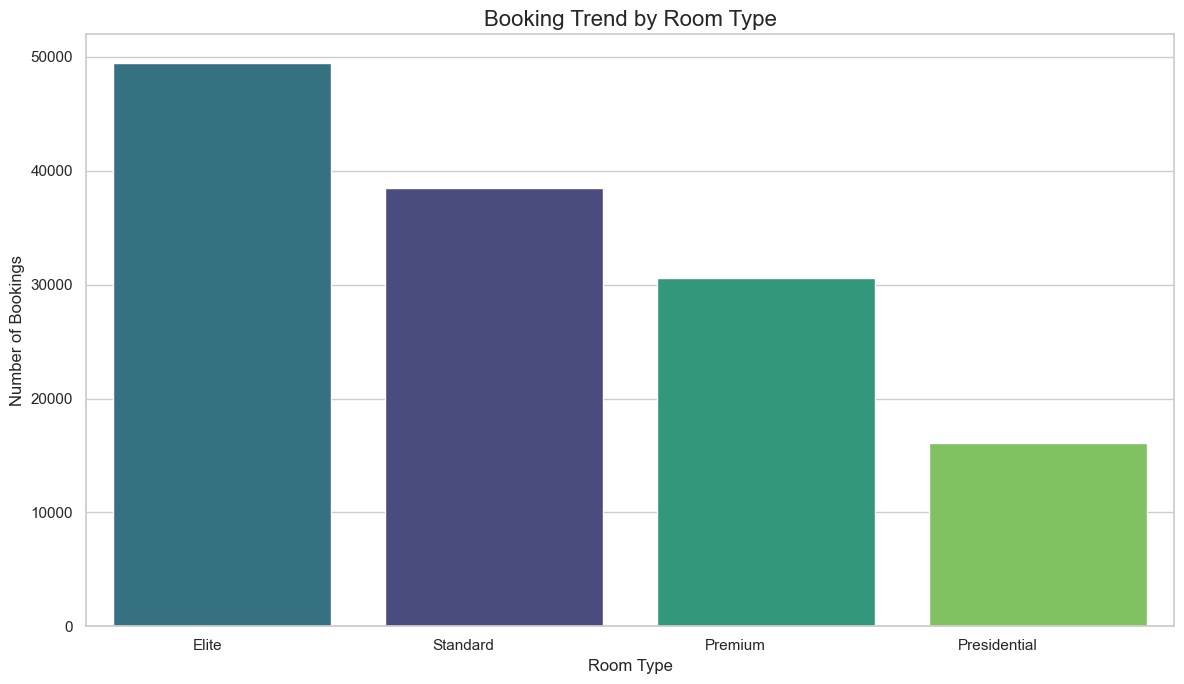

In [8]:
# Define the mapping from room code to room class
dim_rooms_df = pd.read_csv('dim_rooms.csv')
room_mapping = pd.Series(dim_rooms_df.room_class.values, index=dim_rooms_df.room_id).to_dict()

# Create a new column 'room_class' with the full room names
df['room_class'] = df['room_category'].map(room_mapping)

# Create the plot
plt.figure(figsize=(12, 7))

# Determine the order of room classes based on booking counts
order = df['room_class'].value_counts().index

# Use sns.countplot. The 'hue' parameter automatically creates and labels the legend.
sns.countplot(
    data=df,
    x='room_class',
    hue='room_class',
    order=order,
    palette='viridis' # Removed the invalid 'legend=True' argument
)

# Set titles and labels for clarity
plt.title('Booking Trend by Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(rotation=0, ha='right')

# Adjust layout and save the final figure
plt.tight_layout()
plt.savefig('room_type_bookings_with_legend.png')